Introduction
=========

A first attempt for assignment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
from rich import print

import warnings
warnings.filterwarnings('ignore')

In [2]:
# set up a global plt style for the script
# plt.style.use('classic')
plt.rcParams.update({
        "font.size": 11,
        "text.usetex": True,
        "font.family": "serif",
        "legend.fontsize": 'small',
        })

# library code modules

In [ ]:
def inspect_date_format(df):
    """ identifying rows with wrong date formatting """
    
    m = pd.to_datetime(df['Date'], format="%d/%m/%Y", errors='coerce').isna()
    wrong_dates = df.loc[m, 'Date'].unique().tolist()
    print(f"Detected wrong date format: {wrong_dates}")
    
    # pinpoint the rows with such incorrect dates
    for i in wrong_dates:
        print(f"row index with wrong dates '{i}' ==> {df[df['Date'] == i].index}")

In [ ]:
def date_formatting(df):
    return (df
            .assign(datetime = pd.to_datetime(df['Date'], format="%d/%m/%Y"))  
            .set_index('datetime')
            .drop(['Day', 'Date'], axis=1)
           )

# import data

In [3]:
data = pd.read_csv('../data/raw/smedebtsu.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     84 non-null     object 
 1   Day      84 non-null     int64  
 2   Month    84 non-null     int64  
 3   Year     84 non-null     int64  
 4   LenderA  84 non-null     float64
 5   LenderB  84 non-null     float64
 6   LenderC  84 non-null     float64
 7   LenderD  84 non-null     int64  
 8   LenderE  84 non-null     float64
 9   LenderF  84 non-null     float64
 10  LenderG  84 non-null     float64
 11  LenderH  84 non-null     float64
 12  LenderI  84 non-null     float64
 13  LenderJ  84 non-null     float64
 14  LenderK  84 non-null     float64
 15  totalU   84 non-null     float64
dtypes: float64(11), int64(4), object(1)
memory usage: 10.6+ KB


# pre-processing

## clean date format

In [6]:
inspect_date_format(data)

Detected wrong date format: ['04/042022', '02/052022']

row index with wrong dates '04/042022' ==> Index([73], dtype='int64')

row index with wrong dates '02/052022' ==> Index([74, 75], dtype='int64')

In [7]:
# correct wrong date formats in the raw data

data.loc[73, 'Date'] = "04/04/2022"
data.loc[74, 'Date'] = "02/05/2022"
data.loc[75, 'Date'] = "02/05/2022"

In [9]:
data = date_formatting(data)

In [71]:
# data.head()

## check missing data

In [69]:
inspect_missing_data(data, option='nan')

Month      0
Year       0
LenderA    0
LenderB    0
LenderC    0
LenderD    0
LenderE    0
LenderF    0
LenderG    0
LenderH    0
LenderI    0
LenderJ    0
LenderK    0
totalU     0
dtype: int64

In [ ]:
# data.query('data.isna()')

In [70]:
inspect_missing_data(data, option='missing_month')

Total number of months with missing records: 33

Missing months are: 
 PeriodIndex(['2014-02', '2015-06', '2015-07', '2015-09', '2016-03', '2016-04',
             '2017-06', '2017-08', '2018-01', '2018-02', '2018-04', '2018-06',
             '2018-08', '2018-10', '2019-02', '2019-06', '2020-01', '2020-05',
             '2020-07', '2020-09', '2020-10', '2020-11', '2021-01', '2021-02',
             '2021-03', '2021-05', '2021-06', '2021-08', '2022-02', '2022-06',
             '2022-07', '2022-12', '2023-01'],
            dtype='period[M]', name='datetime')

**Conclusion**: 

currently, there is no missing data. However, in the cases there are, we can show the places for missing data

## check duplicated data

In [62]:
def inspect_duplicates(df):
    """ check if exising duplicated data """
    
    num = data.duplicated().sum()
    print(f"Total number of duplicates: {num}")
    print(f"If existing, display duplicated rows:\n\n {data[data.duplicated()]}")

In [63]:
inspect_duplicates(data)

Total number of duplicates: 0

If existing, display duplicated rows:

 Empty DataFrame
Columns: [Month, Year, LenderA, LenderB, LenderC, LenderD, LenderE, LenderF, LenderG, LenderH, LenderI, LenderJ, 
LenderK, totalU]
Index: []

# data visualization

In [25]:
def boxplot_annual_averge(df):

    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(6, 6))
    ax = sns.boxplot(
        data=df, 
        y='totalU', 
        x='Year', 
    )
    ax.set_ylabel('Total Debts')
    ax.yaxis.set_major_formatter('£{x:,.2f}')
    ax.grid(which='both', ls=':')

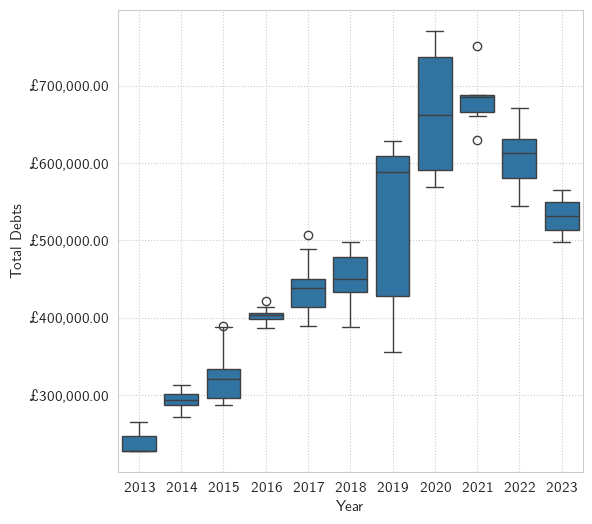

In [26]:
boxplot_annual_averge(data)

In [27]:
def year_average_plot(ax, df, title):

    # plotting style
    ax.plot(df.Month, df.totalU, 
            color='black', marker='o', 
            ls='-', lw=2, mfc = 'salmon', 
            mec = None, markersize=8)

    # x-axis formatting
    ax.set_xlim(0, 13)
    ax.xaxis.set_major_locator(
        mpl.ticker.FixedLocator(np.arange(1,13)))
    
    # y-axis formatting
    ax.set_ylim(200000, 800000)
    ax.yaxis.set_major_locator(
        mpl.ticker.FixedLocator(
            [300000, 400000, 500000, 600000, 700000]))
    ax.yaxis.set_major_formatter('£{x:,.2f}')
    ax.yaxis.set_minor_locator(
        mpl.ticker.AutoMinorLocator(n=2))

    ax.grid(which='both', ls=':')
    ax.set_title(f'{title}')

In [49]:
# # test the plotting func below using one month
# monthly_data = data[data['Year'] == 2013]
# monthly_data.shape

# fig, ax = plt.subplots(figsize=(4,3))
# year_average_plot(ax, monthly_data, title='2013')

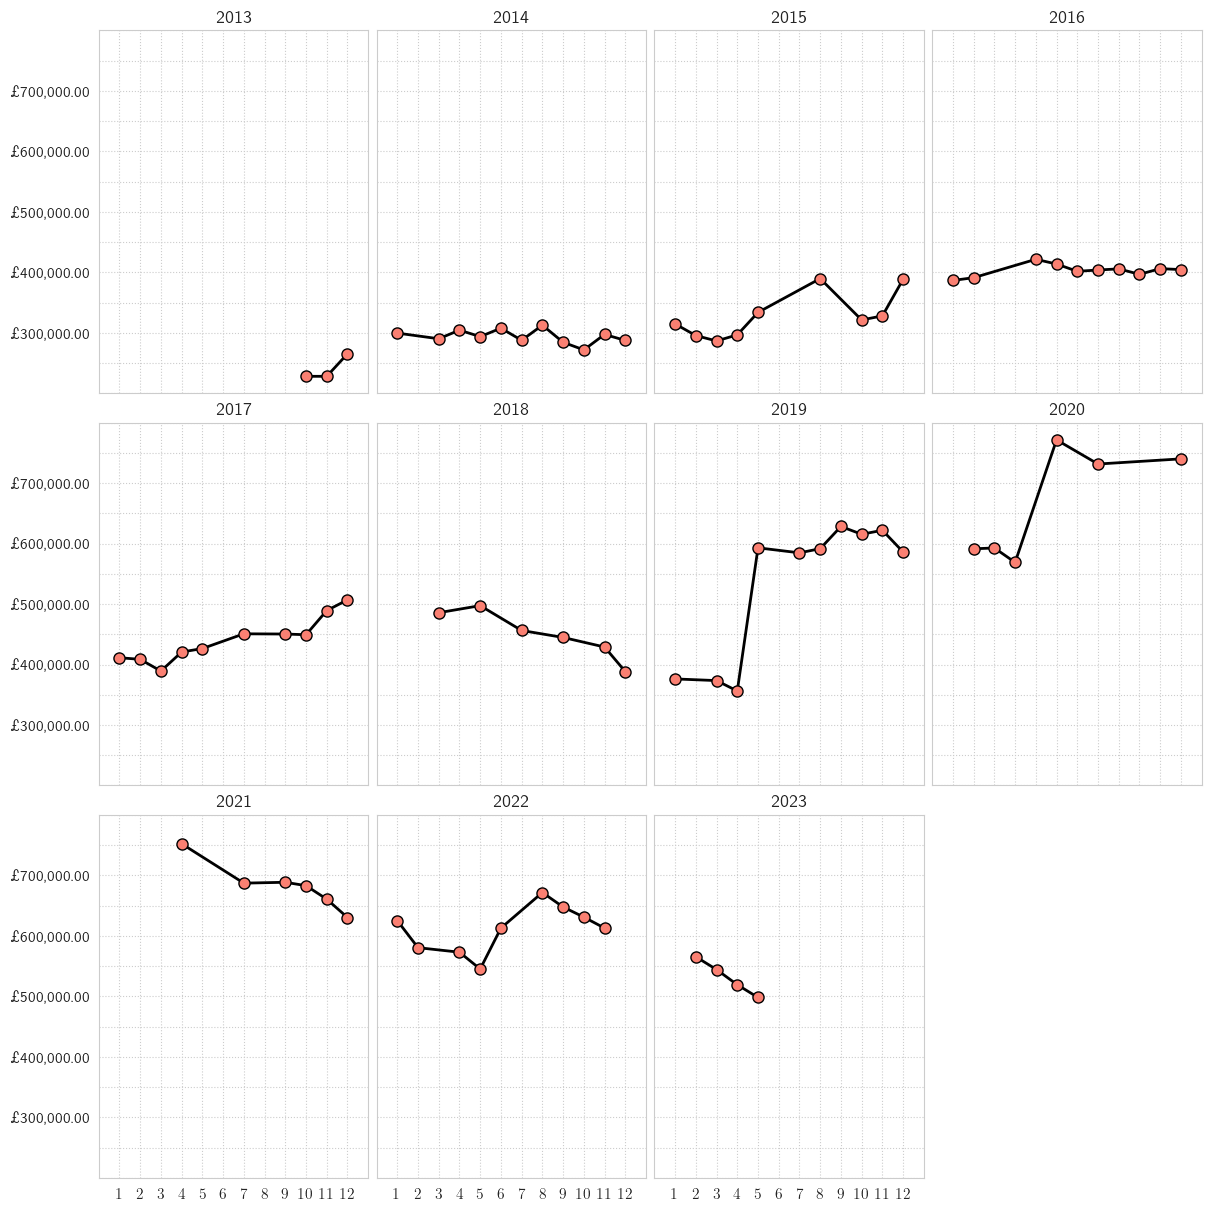

In [29]:
fig, axs = plt.subplots(
    nrows=3, ncols=4, 
    sharex=True, sharey=True,
    layout="constrained",
    figsize=(12, 12))

monthly_data_gen = (data[data['Year'] == year] for year in range(2013, 2024))
year_gen = iter(range(2013, 2024))
    
for row in range(4):
    for col in range(4):
        try: 
            year_average_plot(ax=axs[row, col], df=next(monthly_data_gen), title=next(year_gen))
        except Exception:
            pass
        
fig.delaxes(axs[2][3])
plt.show()

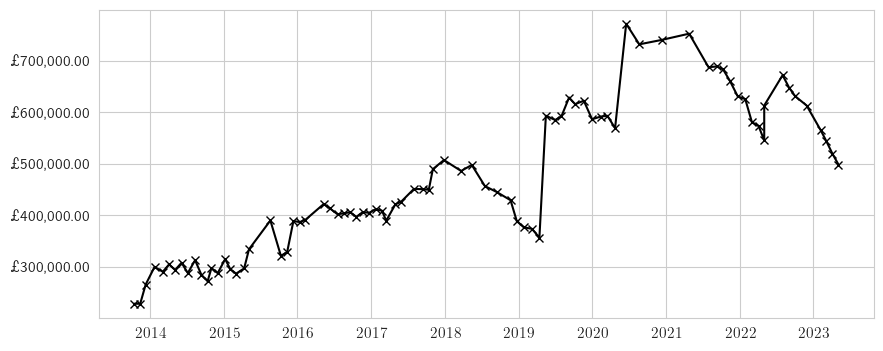

In [50]:
fig, ax  = plt.subplots(figsize=(10, 4))
ax.plot(data.index, data['totalU'], 'k-x')
ax.yaxis.set_major_formatter('£{x:,.2f}')

# predictive modelling

In [30]:
def prepare_TrainTest_data(df, split=0.8):

    """
    args:
        split: split ratio
    """
    y = df[['totalU']].to_numpy().reshape(-1, 1)
    y = y - y.mean()
    X = (df.index.year + df.index.month / 12).to_numpy().reshape(-1, 1)
    
    # change unit to million
    y = y / 1000_000
    
    split_index = int(split * len(df))
    x_train, y_train = X[:split_index], y[:split_index]
    x_test, y_test = X[split_index:], y[split_index:]

    return x_train, y_train, x_test, y_test

In [31]:
x_train, y_train, x_test, y_test = prepare_TrainTest_data(data, split=0.95)

In [32]:
today = datetime.datetime.now()
current_month = today.year + today.month / 12

In [33]:
# the start month of the observation

start = data.index.min()
start_month = start.year + start.month / 12

In [34]:
# the last month of the observation

last = data.index.max()
last_month = last.year + last.month / 12

In [35]:
X_plot = np.linspace(start=start_month, stop=current_month, num=200).reshape(-1, 1)

In [37]:
import gpflow

2023-11-15 11:52:39.122869: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 11:52:39.451421: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-15 11:52:42.153859: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /data/share/soft/anaconda/anaconda3/envs/tf/lib/libfabric::/usr/local/cuda/lib64
2023-11-15 11:52:42.154100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvin

In [38]:
def gp_modelling(X, y):
    
    # get the zero-mean process
    model = gpflow.models.GPR(
        (X, y),
        kernel=gpflow.kernels.SquaredExponential()
        + gpflow.kernels.Periodic(gpflow.kernels.SquaredExponential(), period=1.0),
        # likelihood=gpflow.likelihoods.Gaussian(scale=gpflow.functions.Polynomial(degree=2)),
        # noise_variance = 10_000,
    )

    opt = gpflow.optimizers.Scipy()
    opt.minimize(model.training_loss, model.trainable_variables)
    
    return model

In [47]:
def gp_plotting(X_plot, y_mean, y_var):
    
    # f_mean, f_var = model.predict_f(X_plot, full_cov=False)
    
    # # latent function value
    # f_lower = f_mean - 1.96 * np.sqrt(f_var)
    # f_upper = f_mean + 1.96 * np.sqrt(f_var)
    
    # noisy prediction
    y_lower = y_mean - 1.96 * np.sqrt(y_var)
    y_upper = y_mean + 1.96 * np.sqrt(y_var)
    y_lower_3sigma = y_mean - 3 * np.sqrt(y_var)
    y_upper_3sigma = y_mean + 3 * np.sqrt(y_var)
    
    fig, ax = plt.subplots(figsize=(10, 4))
    # ground truth 
    ax.plot(x_train, y_train, 
            color="green", label="observation", ls='',
             marker='x', ms=5, mew=1.5,
             mec = 'coral', mfc = 'coral')
    
    # ground truth
    ax.plot(x_test, y_test, 
            color="green", ls='',
             marker='x', ms=5, mew=1.5,
             mec = 'coral', mfc = 'coral')
    
    # mean function
    ax.plot(X_plot, y_mean, "-", color="C0", label="mean prediction", zorder=10)

    # plt.plot(X_test, y_lower, ".", color="C0", label="Y 95% confidence")
    # plt.plot(X_test, y_upper, ".", color="C0")

    # 95 confidence interval
    ax.fill_between(
        X_plot[:, 0], y_lower[:, 0], y_upper[:, 0], color="lightblue", alpha=0.3, label='predictive interval')

    # 99 confidence interval
    ax.fill_between(
        X_plot[:, 0], y_lower_3sigma[:, 0], y_upper_3sigma[:, 0], color="lightblue", alpha=0.2)

    ax.axvline(x=x_test[0], ymin=0, ymax=1, c='green', lw=0.75, ls='--', label='train/test split')
    ax.axvline(x=x_test[-1], ymin=0, ymax=1, c='purple', lw=0.75, ls='--', label='future forecast')
    ax.axvline(x=X_plot[-1], ymin=0, ymax=1, c='r', lw=0.75, ls='--', label='current date: 2023/11')
    
    ax.grid(ls=':')
    ax.legend()

In [40]:
model = gp_modelling(x_train, y_train)

2023-11-15 11:53:00.816171: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 11:53:02.936832: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10771 MB memory:  -> device: 0, name: Tesla K80, pci bus id: 0000:04:00.0, compute capability: 3.7
2023-11-15 11:53:02.938209: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10787 MB memory:  -> device: 1, name: Tesla K80, pci bus id: 0000:05:00.0, compute capability: 3.7
2023-11-15 11:53:02.939518: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1616] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 10787 MB m

In [41]:
gpflow.utilities.print_summary(model, "notebook")

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.kernels[0].variance,Parameter,Softplus,,True,(),float64,0.01747
GPR.kernel.kernels[0].lengthscales,Parameter,Softplus,,True,(),float64,0.64407
GPR.kernel.kernels[1].base_kernel.variance,Parameter,Softplus,,True,(),float64,0.00072
GPR.kernel.kernels[1].base_kernel.lengthscales,Parameter,Softplus,,True,(),float64,0.71626
GPR.kernel.kernels[1].period,Parameter,Softplus,,True,(),float64,1.07198
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,0.00095


In [42]:
y_mean, y_var = model.predict_y(X_plot)

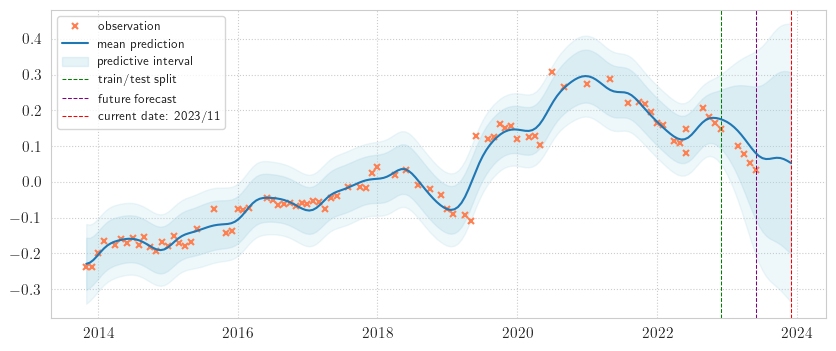

In [48]:
gp_plotting(X_plot, y_mean, y_var)

In [ ]:
## to compute some metrics ...

In [ ]:
## Machine Learning models in an autoregressive scheme

In [ ]:
# a table showing the accuracy metrics